<a href="https://colab.research.google.com/github/radhakrishnan-omotec/football_predict/blob/main/Aditya_Raunaq_Project_2_Football_player_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football-player-price-prediction

In [1]:
!git clone https://github.com/radhakrishnan-omotec/football_predict.git

Cloning into 'football_predict'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 1.28 MiB | 18.92 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## To train the models

## To deploy the model

It is the Random Forest according to our implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
import json
import pickle

In [3]:
df = pd.read_csv('/content/football_predict/football.csv')

In [4]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [5]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


 ## Step 1 : Training and testing the dataset

In [8]:
train_df, test_df = train_test_split(df)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 21 to 83
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          345 non-null    object 
 1   club          345 non-null    object 
 2   age           345 non-null    int64  
 3   position      345 non-null    object 
 4   position_cat  345 non-null    int64  
 5   market_value  345 non-null    float64
 6   page_views    345 non-null    int64  
 7   fpl_value     345 non-null    float64
 8   fpl_sel       345 non-null    object 
 9   fpl_points    345 non-null    int64  
 10  region        344 non-null    float64
 11  nationality   345 non-null    object 
 12  new_foreign   345 non-null    int64  
 13  age_cat       345 non-null    int64  
 14  club_id       345 non-null    int64  
 15  big_club      345 non-null    int64  
 16  new_signing   345 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 48.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 454 to 207
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          116 non-null    object 
 1   club          116 non-null    object 
 2   age           116 non-null    int64  
 3   position      116 non-null    object 
 4   position_cat  116 non-null    int64  
 5   market_value  116 non-null    float64
 6   page_views    116 non-null    int64  
 7   fpl_value     116 non-null    float64
 8   fpl_sel       116 non-null    object 
 9   fpl_points    116 non-null    int64  
 10  region        116 non-null    float64
 11  nationality   116 non-null    object 
 12  new_foreign   116 non-null    int64  
 13  age_cat       116 non-null    int64  
 14  club_id       116 non-null    int64  
 15  big_club      116 non-null    int64  
 16  new_signing   116 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 16.3+ KB


In [11]:
test_df.to_csv('/content/football_predict/test_df.csv', index=False)

In [12]:
train_df.to_csv('/content/football_predict/train_df.csv', index=False)

## Step 2 : Pre-processing the dataset

In [13]:
# Remove % sign from fpl_sel and convert to float
train_df.fpl_sel = train_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [14]:
train_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
21,Lucas Perez,Arsenal,28,CF,1,15.0,2055,7.5,0.1,20,2.0,Spain,0,4,1,1,1
269,Marcos Rojo,Manchester+United,27,CB,3,18.0,1063,5.5,0.1,77,3.0,Argentina,0,3,12,1,0
313,Maya Yoshida,Southampton,28,CB,3,5.0,317,5.0,1.1,78,4.0,Japan,0,4,14,0,0
296,Jonjo Shelvey,Newcastle+United,25,CM,2,11.0,747,5.5,2.5,0,1.0,England,0,3,13,0,0
146,Gareth Barry,Everton,36,DM,2,1.5,1331,4.5,1.7,68,1.0,England,0,6,7,0,0


In [15]:
# Remove % sign from fpl_sel and convert to float
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [16]:
test_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
454,Angelo Ogbonna,West+Ham,29,CB,3,9.0,247,4.5,1.1,45,2.0,Italy,0,4,20,0,0
39,Marc Pugh,Bournemouth,30,LW,1,2.0,140,5.0,0.1,64,1.0,England,0,4,2,0,0
292,Jesus Gamez,Newcastle+United,32,RB,3,2.5,186,4.0,2.3,0,2.0,Spain,0,5,13,0,0
242,Raheem Sterling,Manchester+City,22,LW,1,45.0,2074,8.0,3.8,149,1.0,England,0,2,11,1,0
235,Joe Gomez,Liverpool,20,CB,3,4.0,460,4.5,0.4,0,1.0,England,0,1,10,1,0


In [17]:
train_df = train_df.dropna()
train_df.shape

(344, 17)

In [18]:
test_df = test_df.dropna()
test_df.shape

(116, 17)

## Data Visualization:
### A. HEAT MAP

<ipython-input-22-9150eb4bafe6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")


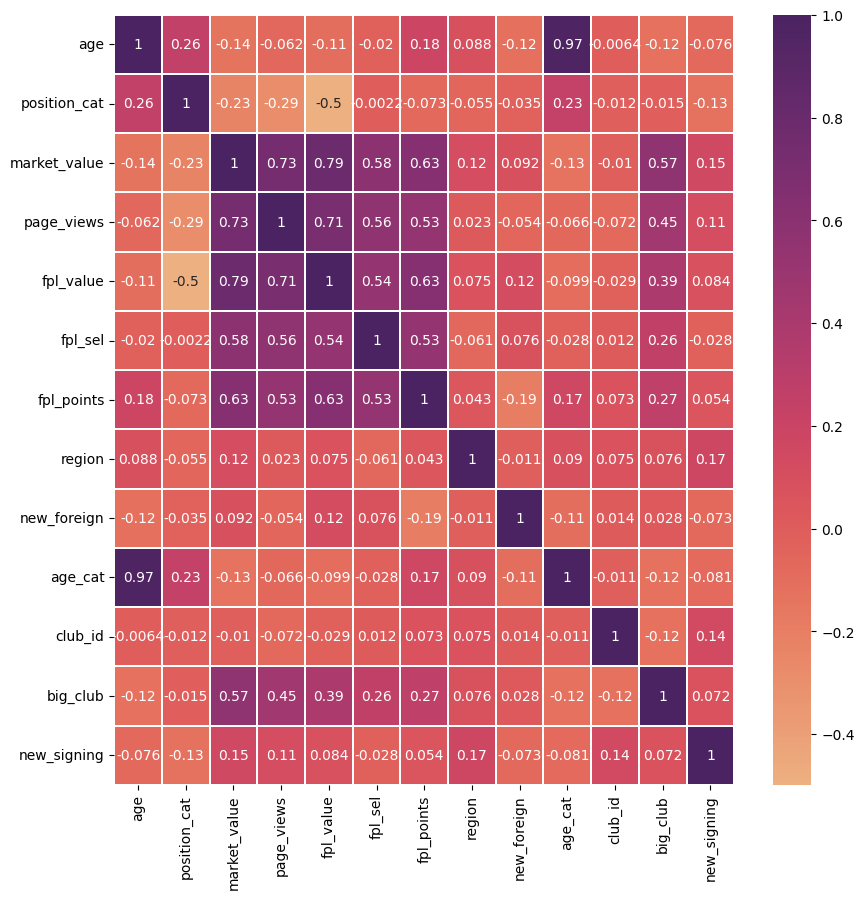

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")
plt.show()

### Either use age or age_cat. They are highly correlated

### Also, fpl_value, page_views are important for market_value

In [23]:
removed_df = train_df.drop(['name','club','age_cat','position'], axis=1)

In [24]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 21 to 83
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           344 non-null    int64  
 1   position_cat  344 non-null    int64  
 2   market_value  344 non-null    float64
 3   page_views    344 non-null    int64  
 4   fpl_value     344 non-null    float64
 5   fpl_sel       344 non-null    float64
 6   fpl_points    344 non-null    int64  
 7   region        344 non-null    float64
 8   nationality   344 non-null    object 
 9   new_foreign   344 non-null    int64  
 10  club_id       344 non-null    int64  
 11  big_club      344 non-null    int64  
 12  new_signing   344 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 37.6+ KB


In [25]:
removed_df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,club_id,big_club,new_signing
21,28,1,15.0,2055,7.5,0.1,20,2.0,Spain,0,1,1,1
269,27,3,18.0,1063,5.5,0.1,77,3.0,Argentina,0,12,1,0
313,28,3,5.0,317,5.0,1.1,78,4.0,Japan,0,14,0,0
296,25,2,11.0,747,5.5,2.5,0,1.0,England,0,13,0,0
146,36,2,1.5,1331,4.5,1.7,68,1.0,England,0,7,0,0


## B. PAIR PLOT

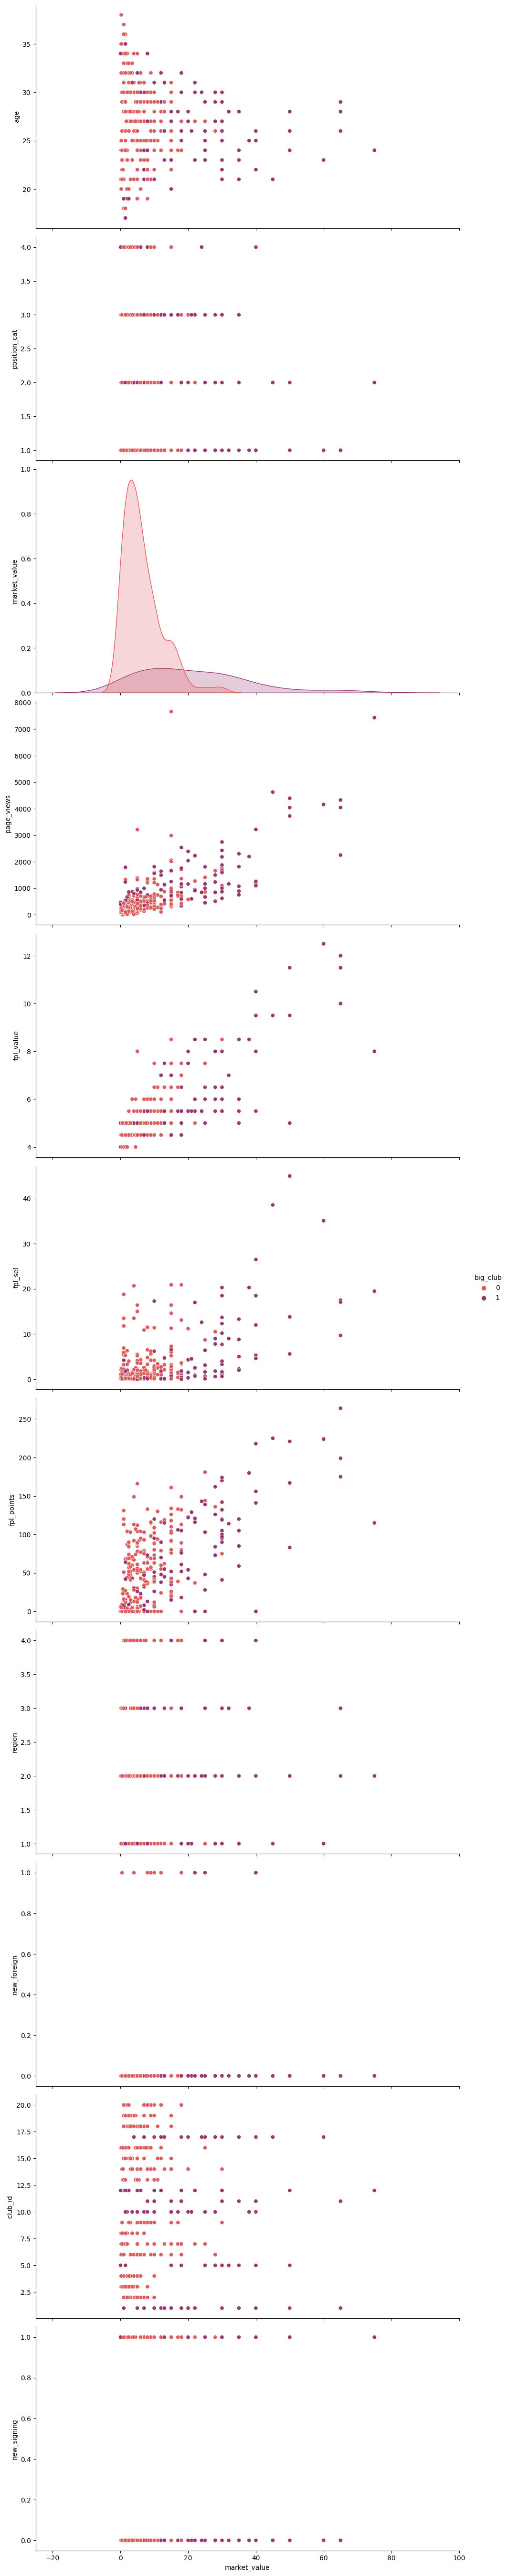

In [28]:
sns.pairplot(removed_df, x_vars='market_value', hue = 'big_club', height = 5, aspect = 2 , palette='flare')

The continuous variables are nicely correlated with the market value. Mostly linear

Those who belong to big club have higher market value

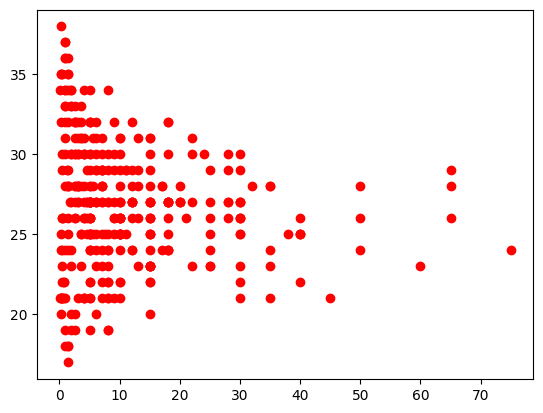

In [38]:
plt.scatter(removed_df.market_value, removed_df.age , c ='red')

Interestingly, it looks like a normal distribution.

Players aged around 25 have higher market value

**Binning might help**

* I'll bring back the age_cat attribute and move further with that one

In [39]:
removed_df = pd.concat([removed_df.drop('age', axis=1), df.age_cat], axis=1)

In [40]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 21 to 458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 50.4+ KB


In [41]:
all_columns = removed_df.columns
category_cols = ['position_cat', 'region', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing', 'age_cat']

In [43]:
all_columns

Index(['position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_sel',
       'fpl_points', 'region', 'nationality', 'new_foreign', 'club_id',
       'big_club', 'new_signing', 'age_cat'],
      dtype='object')

In [44]:
final_df = removed_df.copy()
final_df.reset_index(drop=True, inplace=True)

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 46.9+ KB


In [46]:
column_dict = {i:[] for i in category_cols}
for i in category_cols:
    temp = pd.get_dummies(final_df[i], prefix=i)
    column_dict[i].extend(temp.columns)
    others = pd.Series(np.zeros(final_df.shape[0]), name=i+'_others')
    temp = pd.concat([temp, others], axis=1)
    final_df = pd.concat([final_df.drop(i, axis=1), temp], axis=1)

In [47]:
final_df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1.0', 'position_cat_2.0', 'position_cat_3.0',
       'position_cat_4.0', 'position_cat_others',
       ...
       'new_signing_0.0', 'new_signing_1.0', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=106)

In [49]:
all_cat_cols = []
for i in column_dict.keys():
    all_cat_cols.extend(column_dict[i]+[i+'_others'])

#RK all_cat_cols

In [51]:
cont_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   page_views  344 non-null    float64
 1   fpl_value   344 non-null    float64
 2   fpl_sel     344 non-null    float64
 3   fpl_points  344 non-null    float64
dtypes: float64(4)
memory usage: 14.5 KB


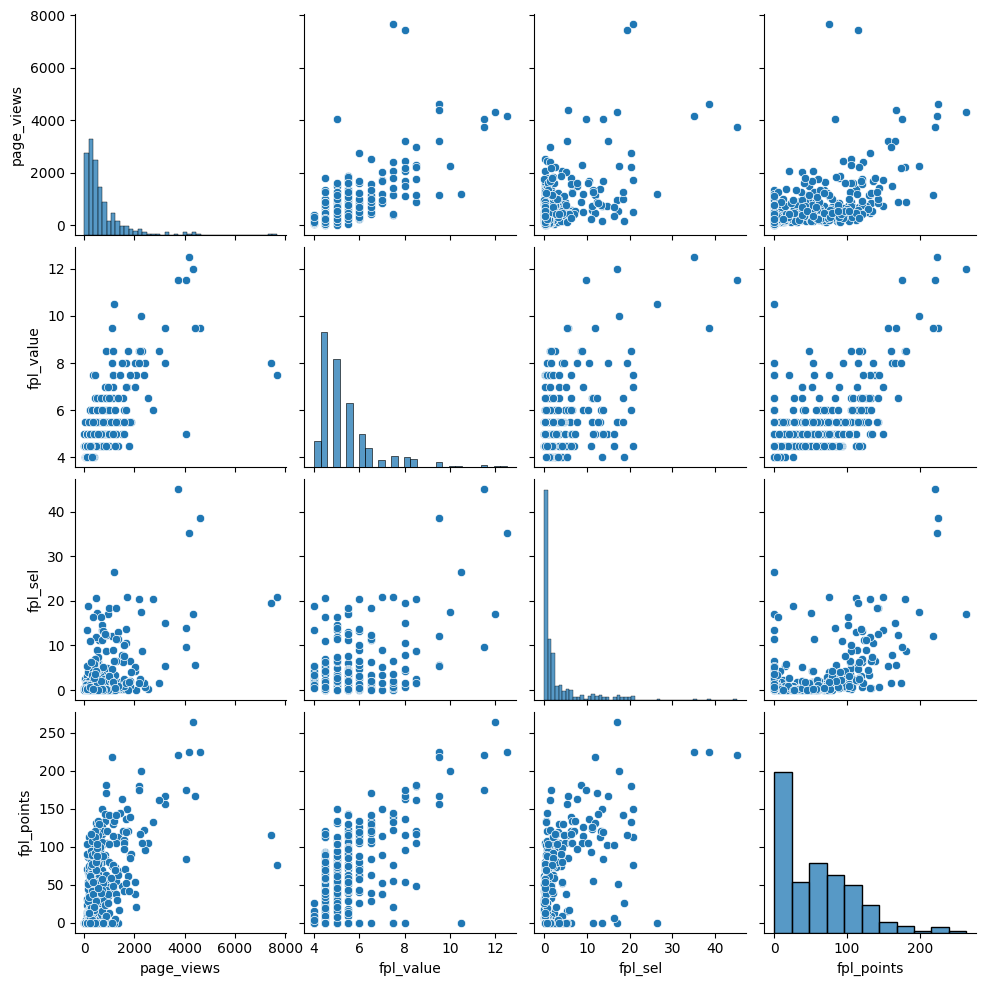

In [65]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.pairplot(cont_cols_df)

<hr>